# 3. Stations

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [448]:
%run 'Color_and_Legends.ipynb'

In [449]:
%run 'Plotting_Tools.ipynb'

In [450]:
%run 'Load_Delay_Data_Frame.ipynb'

Update the stations to append the line to the name 

In [451]:
ttc['Station_Line'] = ttc['Station'] + ' (' + ttc['Line'] + ')'
ttc['Station_Line'].head(5)
station_group = ttc.groupby('Station_Line')

Lets order the stations by the most delays

In [452]:
def create_station_summary(station_group, sort_by):
    # Count 
    station_delay_count = station_group.size()
    sorted_delay_count = station_delay_count.sort_values(ascending=False)
    
    # Total Delays
    station_delay_total = station_group['Min Delay'].sum()
    station_delay_total = station_delay_total.sort_values(ascending=False)
    
    # Average Delay
    station_delay_average = station_group['Min Delay'].mean()
    station_delay_average = station_delay_average.sort_values(ascending=False)

    station_summary = pd.DataFrame({'Count': station_delay_count, 'Total Delay': station_delay_total, 'Average Delay': station_delay_average})
    return station_summary.sort_values(by=sort_by, ascending=False)
    

In [453]:
def createColorsForGraph(main_series):
    bar_colors = []
    for station in main_series.index:
        line = station.split('(')[1][:-1]
        color = line_color_map[line]
        bar_colors.append(color)
    return bar_colors

In [454]:
def plot_station_charts(dataset_one, dataset_two, dataset_thee, c):

    fix, ax = plt.subplots(3,1, figsize=(15,15), sharex=True)

    dataset_one.plot.bar(ax=ax[0], title='Total Time Delayed', color=c)
    dataset_two.plot.bar(ax=ax[1], title='Total Number of Delays', color=c)
    dataset_thee.plot.bar(ax=ax[2], title='Average Delay Time', color=c)
    ax[0].legend(handles=line_patches)
    plt.show()

In [455]:
station_summary = create_station_summary(station_group, ['Total Delay', 'Count', 'Average Delay'])
station_summary.head(2)
# station_summary.plot.bar(figsize=(15,5))
# plt.show()

,Average Delay,Count,Total Delay
KENNEDY - BD (Bloor-Danforth),1.597296,3402,5434
MCCOWAN (Scarborough RT),5.343921,913,4879


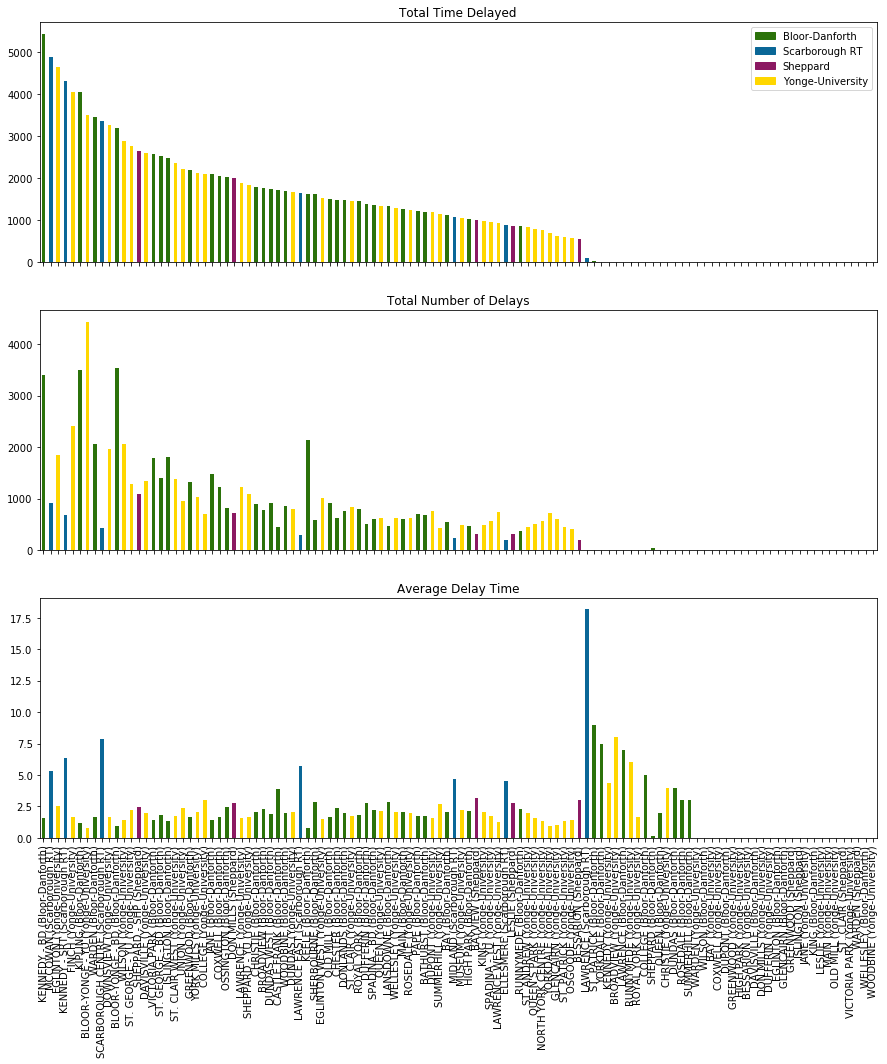

In [456]:
colors_stations = createColorsForGraph(station_summary['Total Delay'])
plot_station_charts(station_summary['Total Delay'], station_summary['Count'], station_summary['Average Delay'], colors_stations)

### Top Delays across all stations

Looks like a fiar number of statinos don't even register so lets look at the stations with the top number of 'Total Delays'

In [457]:
station_with_most_delays = station_summary['Total Delay'][:50].index
top_delays_stations = ttc[ttc['Station_Line'].isin(station_with_most_delays)]
top_delays_station_group  = top_delays_stations.groupby('Station_Line')
top_station_summary = create_station_summary(top_delays_station_group, ['Total Delay', 'Count', 'Average Delay'])

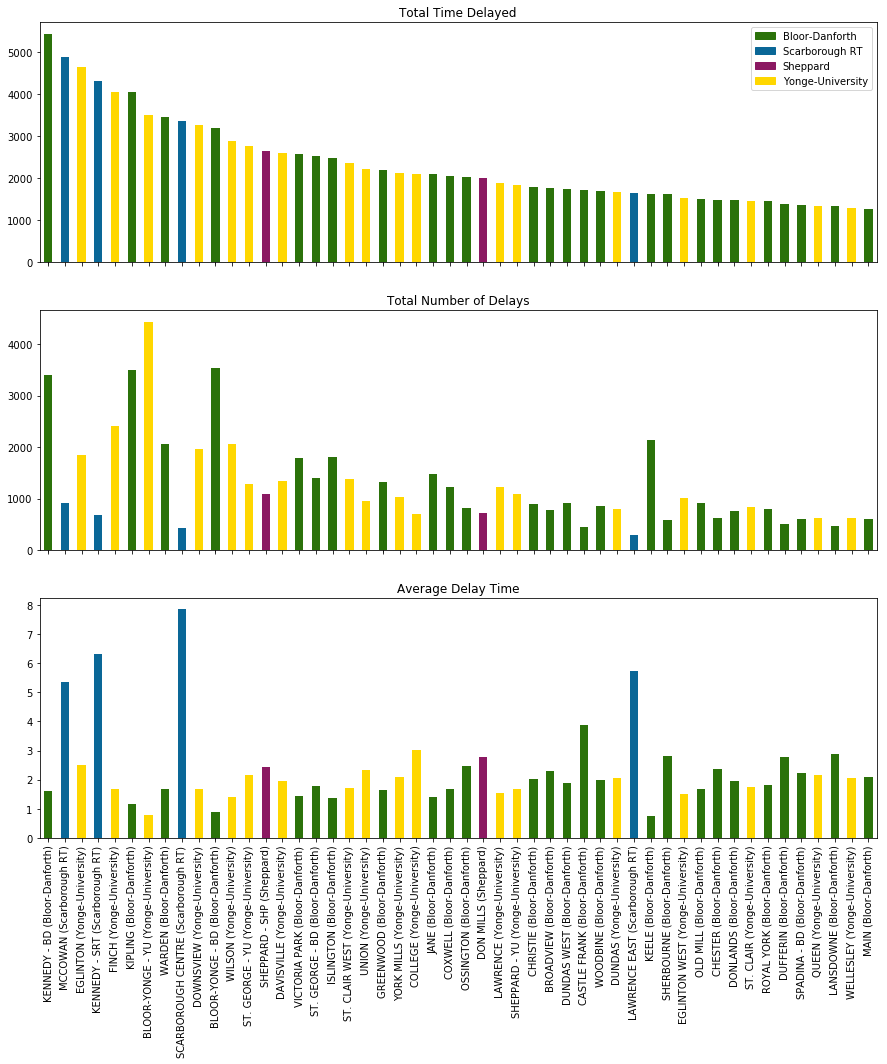

In [458]:
top_colors = createColorsForGraph(top_station_summary['Total Delay'])
plot_station_charts(top_station_summary['Total Delay'], top_station_summary['Count'], top_station_summary['Average Delay'], top_colors)

Looks like the worse stations for each line are:
Kennedy (BD)
McCowand (SRT)
Eglinton (YU)
Finch (YU)
Kipling (BD)
Warnde (BD)
Scarbought Town Center (SRT)
...
Yonge (Scar)
Don Mills (Scar)

Many of these are the end of the line stations are at the end

### Break down by individual lines

In [459]:
def plot_total_delay_for_line(line, c):
    line_stations = ttc[ttc['Line'] == line]
    line_station_group  = line_stations.groupby('Station_Line')
    line_station_summary = create_station_summary(line_station_group, ['Total Delay', 'Count', 'Average Delay'])
    line_station_summary['Total Delay'][:25].plot.bar(title='Total Time Delayed', color=c, figsize=(15,5))
    plt.show()

#### Yonge University

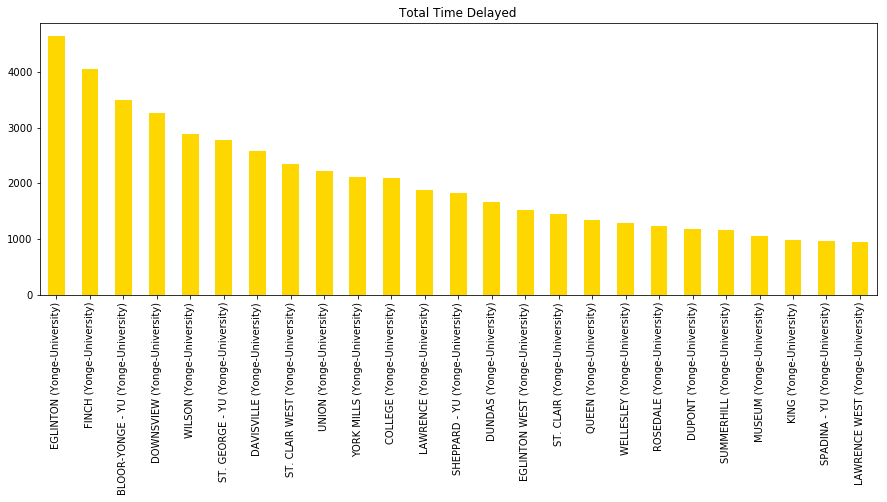

In [460]:
plot_total_delay_for_line('Yonge-University', yonge_color)

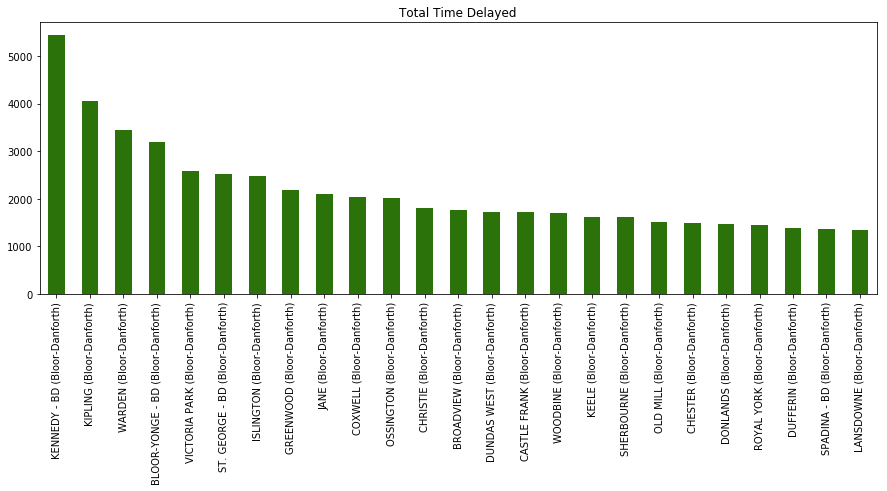

In [461]:
plot_total_delay_for_line('Bloor-Danforth', bloor_color)

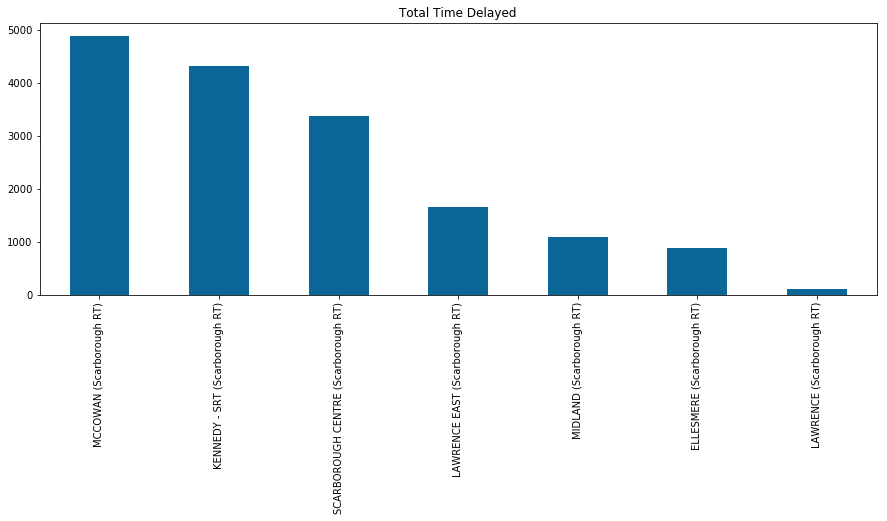

In [462]:
plot_total_delay_for_line('Scarborough RT', scarborough_color)

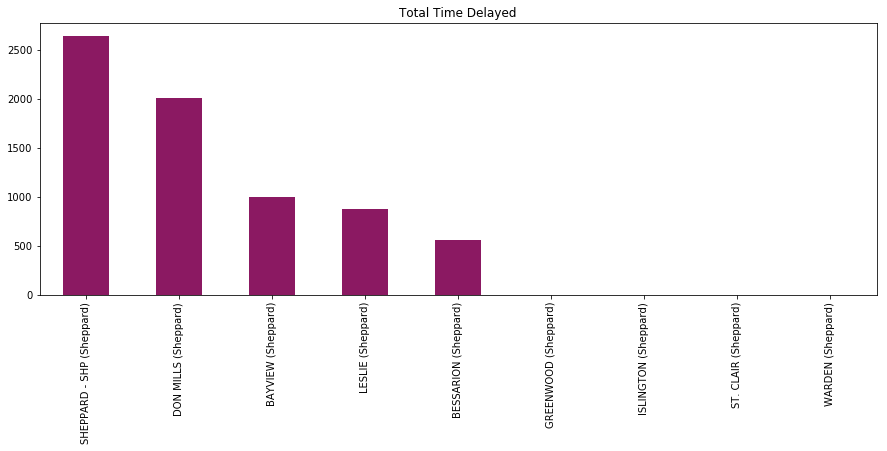

In [463]:
plot_total_delay_for_line('Sheppard', sheppard_color)

## Notes

The end stations of all the lines have the most delays
**Sheppard** Top two are: Sheppard and Don Milles
**Bloor** Two three are: Kennedy and Kipling
**Scarborough** McCowan/Kennedy
**Yonge** Finch and Downsview are in the top three

**Exception** Eglinton has the most delays on the Yonge line even though it is not an end station

## Stations Ridership

Load in the stations metadata and merge with the ttc delays

In [464]:
stations = pd.read_csv('../stations_ridership.csv')
ttc_stations = ttc.merge(stations, on='Station')
ttc_stations.head(2)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description,Hour,Year,Station_Line,Grade,2014 Total,2015 Total
0,2014-01-01,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron,2,2014,HIGH PARK (Bloor-Danforth),Underground/Surface,9753,10658
1,2014-01-05,16:29,Sunday,HIGH PARK,PUMST,0,0,NaN,Bloor-Danforth,NaN,HIGH PARK STATION,BD,Station Stairway Incident,16,2014,HIGH PARK (Bloor-Danforth),Underground/Surface,9753,10658


http://www.ttc.ca/About_the_TTC/Operating_Statistics/2013.jsp


https://en.wikipedia.org/wiki/List_of_Toronto_subway_stationsm

https://www.ttc.ca/PDF/Transit_Planning/Subway%20ridership%202015.pdf

### Delays and Ridership

In [465]:
# ridership_total_delay = ttc_stations.groupby('2014 Total')['Min Delay'].sum()
# ridership_total_delay.plot()
# plt.show()

We can see a trend here the stations with the higher ridership do tend to have more delays

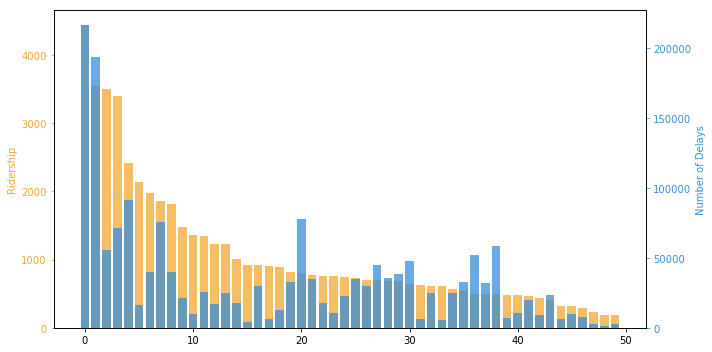

In [466]:
count_color = '#388dd8'
ridership_color = '#f2a730'

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(x, station_delay_ridership['Count'], alpha=0.75, label='Count', color=ridership_color)
ax1.set_ylabel('Ridership', color=ridership_color)
ax1.tick_params('y', colors=ridership_color)

ax2 = ax1.twinx()
ax2.bar(x, station_delay_ridership['2015 Total'], alpha=0.75, label='Ridership', color=count_color)
ax2.set_ylabel('Number of Delays', color=count_color)
ax2.tick_params('y', colors=count_color)
fig.tight_layout()
plt.show()

Looks like there is a trend here between ridership and total number of delay

## Grade (outside/inside)

TODO: Stations getting better

In [467]:
def createColorsForGradeBars(main_series):
    bar_colors = []
    for station in main_series.index:
        grade = stations[stations['Station'] == station]['Grade'].values[0]
        color = grade_color_map.get(grade, 'gray')
        bar_colors.append(color)
    return bar_colors

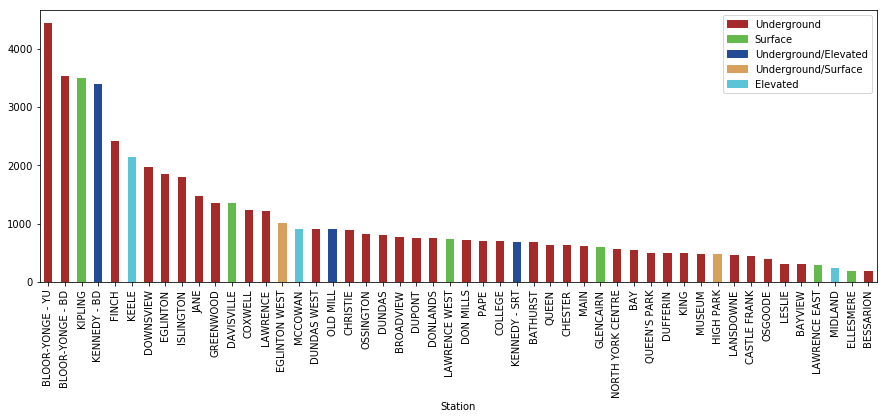

In [468]:
top_delays = ttc_stations.groupby('Station').size()[:50]
top_delays = top_delays.sort_values(ascending=False)
grade_colors = createColorsForGradeBars(top_delays)
ax = top_delays.plot.bar(color=grade_colors, figsize=(15,5))
ax.legend(handles=grade_patches)
plt.show()

**NOTE** Looks like **Surface** delays clear the fastest while **elevated** clear the slower

In [469]:
ttc_stations.groupby('Grade')['Min Delay'].mean().sort_values(ascending=False)

Grade
Elevated                2.943041
Underground/Elevated    2.254502
Underground             1.812204
Underground/Surface     1.709005
Surface                 1.549172
Name: Min Delay, dtype: float64

In [470]:
# pd.crosstab(ttc_stations['Line'], ttc_stations['Grade'])

In [471]:
# pd.crosstab(ttc_stations['Line'], ttc_stations['Grade'], normalize='index')

Looks like **Elevated** has the most delays followed by **Underground/Elevated** and **Surface**

**Undergroup** and **Underground/Surface** have the last number

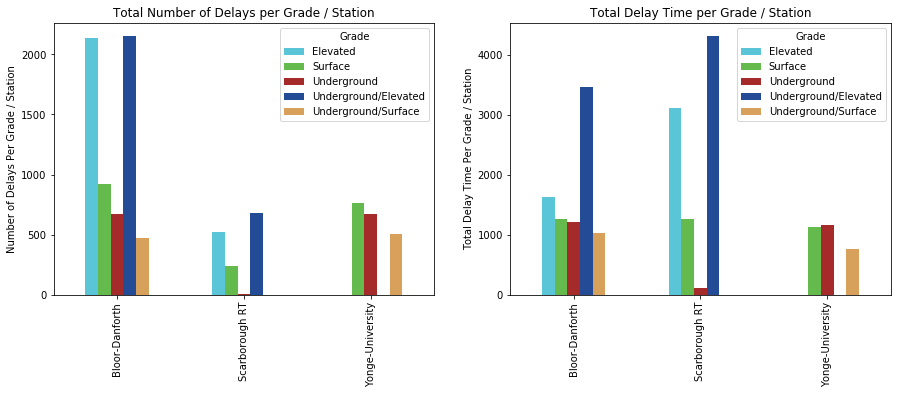

,Bloor-Danforth,Scarborough RT,Yonge-University
Grade,,,
Elevated,2137.000000,525.0,NaN
Surface,918.250000,240.0,759.25000
Underground,667.882353,6.0,673.25641
Underground/Elevated,2154.500000,684.0,1.00000
Underground/Surface,472.000000,NaN,507.00000


In [472]:
groups = ttc_stations.groupby(['Line'])
g_colors = [elevated_color, surface_color, underground_color, undergroup_elevated, underground_surface]

station_grades_size = pd.DataFrame()
station_grades_total = pd.DataFrame()
for title, group in groups:
    station_grades_size[title] = group.groupby('Grade').size() / group.groupby('Grade')['Station'].nunique()
    station_grades_total[title] = group.groupby('Grade')['Min Delay'].sum() / group.groupby('Grade')['Station'].nunique()

## Drop sheppard since we know it doesn't have any surfaces lines
station_grades_size = station_grades_size.drop('Sheppard', axis=1)
station_grades_total = station_grades_total.drop('Sheppard', axis=1)

fig, ax = plt.subplots(1,2, figsize=[15,5])

station_grades_size.T.plot.bar(color=g_colors, ax=ax[0], title='Total Number of Delays per Grade / Station')
ax[0].set_ylabel('Number of Delays Per Grade / Station')

station_grades_total.T.plot.bar(color=g_colors, ax=ax[1], title='Total Delay Time per Grade / Station')
ax[1].set_ylabel('Total Delay Time Per Grade / Station')

plt.show()
station_grades

In [473]:
station_grades_size, station_grades_total

(                      Bloor-Danforth  Scarborough RT  Yonge-University
 Grade                                                                 
 Elevated                 2137.000000           525.0               NaN
 Surface                   918.250000           240.0         759.25000
 Underground               667.882353             6.0         673.25641
 Underground/Elevated     2154.500000           684.0           1.00000
 Underground/Surface       472.000000             NaN         507.00000,
                       Bloor-Danforth  Scarborough RT  Yonge-University
 Grade                                                                 
 Elevated                 1624.000000          3110.0               NaN
 Surface                  1261.750000          1262.0       1122.375000
 Underground              1207.264706           109.0       1165.948718
 Underground/Elevated     3471.500000          4321.0          0.000000
 Underground/Surface      1023.000000             NaN        76

## Stations over the year

In [643]:
year_size = ttc.groupby(['Station_Line', 'Year']).size().unstack()
year_size['Delay Diff'] = year_size[2016] - year_size[2014]

In [644]:
station_degradation = year_size.sort_values(by='Delay Diff', ascending=False)[:20]['Delay Diff']
station_improvement = year_size.sort_values(by='Delay Diff')[:20][::-1]['Delay Diff']

## Looks like most of the stations that got worse are on the **Bloor Line**

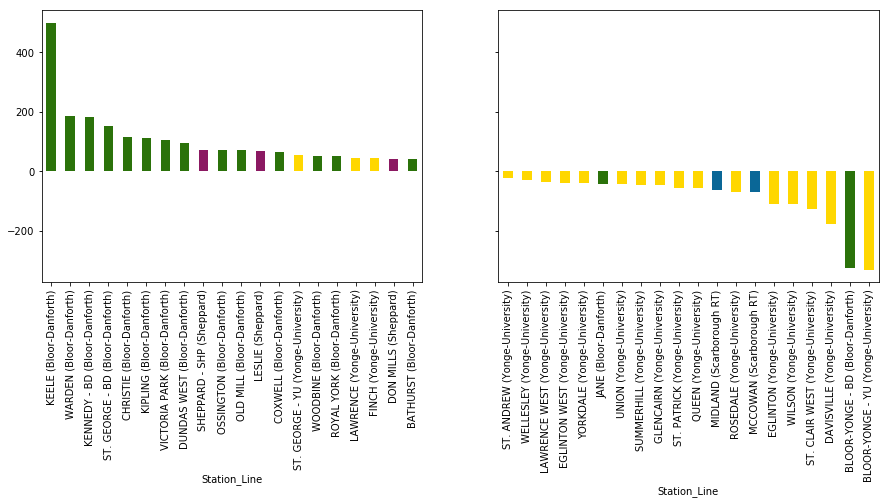

In [645]:
fig, ax = plt.subplots(1,2, figsize=[15,5], sharey = True)

degradation_colors = createColorsForGraph(station_degradation)
station_degradation.plot.bar(color = degradation_colors, ax=ax[0])

improvement_colors = createColorsForGraph(station_improvement)
station_improvement.plot.bar(color = improvement_colors, ax=ax[1])

plt.show()

### TODO: What about these stations ridership changes

In [686]:
station_line = ttc.groupby(['Station', 'Line'], as_index=False).size()
ttc_stations_trimmed = station_line[station_line > 50]
ttc_stations_trimmed = pd.DataFrame(ttc_stations_trimmed)
ttc_stations_trimmed['Station'] = ttc_stations_trimmed.index.get_level_values(0)
ttc_stations_trimmed['Line'] = ttc_stations_trimmed.index.get_level_values(1)
ttc_stations_trimmed
station_line_ridership = stations.merge(ttc_stations_trimmed, on='Station')

station_line_ridership = station_line_ridership[['Station', 'Line', 'Grade', '2014 Total','2015 Total','Diff']]
station_line_ridership['Station_Line'] = station_line_ridership['Station'] + ' (' + station_line_ridership['Line'] + ')'

year_size['Station_Line'] = year_size.index
year_size

station_line_ridership_year = station_line_ridership.merge(year_size, on='Station_Line')
station_line_ridership_year.head(1)

,Station,Line,Grade,2014 Total,2015 Total,Diff,Station_Line,2014,2015,2016,2017,Delay Diff
0,COLLEGE,Yonge-University,Underground,47941,44593,-3348,COLLEGE (Yonge-University),183.0,191.0,182.0,139.0,-1.0


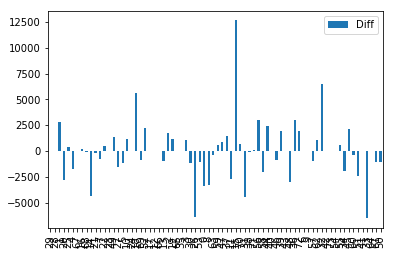

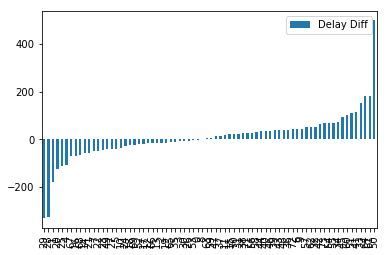

In [685]:
slry_sorted = station_line_ridership_year.sort_values(by='Delay Diff')
rider_diff = slry_sorted['Diff']
delay_diff = slry_sorted['Delay Diff']

# plt.plot(delay_diff, rider_diff)

slry_sorted[['Station','Diff']].plot.bar()
slry_sorted[['Station','Delay Diff']].plot.bar()
plt.show()

### What about the lines

Looks like by both metrics of the number of delays and the total delays **Yonge-Univerity** has impvoed the most while
**bloor-yonge** 

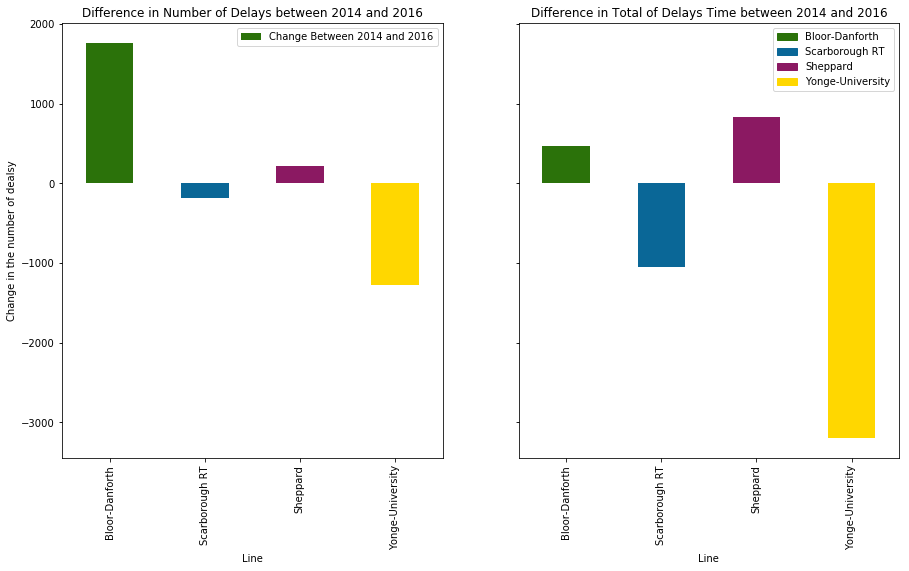

In [500]:
line_year = ttc.groupby(['Line', 'Year']).size().unstack()
line_size_diff = pd.DataFrame()
line_size_diff['Change Between 2014 and 2016'] = line_year[2016] - line_year[2014]

year_line_sums = ttc.groupby(['Line', 'Year'])['Min Delay'].sum().unstack()
line_total_diff = pd.DataFrame()
line_total_diff['Change Between 2014 and 2016'] = year_line_sums[2016] - year_line_sums[2014]

fig, ax = plt.subplots(1,2, figsize=(15,8), sharey=True)

line_size_diff.plot.bar(ax=ax[0], color=colors, title='Difference in Number of Delays between 2014 and 2016')
ax[0].set_ylabel('Change in the number of dealsy')

line_total_diff.plot.bar(ax=ax[1], color=colors, title='Difference in Total of Delays Time between 2014 and 2016')
ax[1].set_ylabel('Change in the total time delayed')
ax[1].legend(handles=line_patches)
plt.show()

Looks like Yonge-University is getter better as it Scarbourought RT BUT Sheppard and Blood are getting worse

### Question what about ridership over the years?

In [551]:
stations_only = ttc[['Station', 'Line']].drop_duplicates().dropna()
station_and_line = stations_only.merge(stations, on='Station')

**NOTE** Looks like the ridership of **Bloor-Danforth** went up way while **Yonge Univerity** went down -- which could explain some of these extra delays

It's also worth nothing **Bloor-Danforth** is still operating on the older street cars

While the **Yonge-University** Line go the 'Toronto Rocket' cars .

While the ridership and delays at a station don't seem to b related they do seem to be related across the entire line.

Source:
https://en.wikipedia.org/wiki/Toronto_Rocket

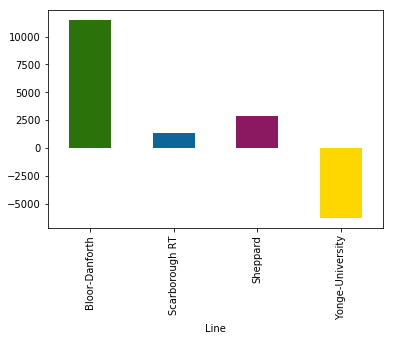

,2014 Total,2015 Total
Line,,
Bloor-Danforth,1571941,1560469
Scarborough RT,102219,100868
Sheppard,215519,212652
Yonge-University,1852445,1858724


In [552]:
line_ridership = station_and_line.groupby('Line')[['2014 Total','2015 Total']].sum()
line_ridership_diff = line_ridership['2014 Total'] - line_ridership['2015 Total']
line_ridership_diff.plot.bar(color=colors)
plt.show()
line_ridership

https://www1.toronto.ca/wps/portal/contentonly?vgnextoid=c077c316f16e8410VgnVCM10000071d60f89RCRD
We should be able to merge this in the other years of ridership